**Submitted by:**

Farah Arooj (SP22-BAI-011)

Zainab Rizwan (SP22-BAI-054)

Aliza Yousaf (SP22-BAI-006)

# **Importing Libraries and Dataset**

Diabetes Prediction dataset was selected for this project to implement and test Linear Classifier and Logistic Regression Classifier.
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

**Libraries utilized:**

**Pandas:** This library healped in data management and preprocessing. It facilitated seamless data loading, cleaning, and transformation. With its DataFrame structures, we were able to efficiently manipulate and analyze the dataset.

**NumPy:** The array-based data structure of NumPy was crucial for computations required in both preprocessing and modeling stages.

**Scikit-learn**: This comprehensive Machine Learning library offered a user-friendly interface for implementing a range of algorithms. Scikit-learn provided smooth access to pre-built implementations of linear classifiers and logistic regression.

**Matplotlib**: MatplotLib helped in exploratory data analysis (EDA). Its versatile plotting functions enabled us to generate insightful visualizations, correlation matrices, confusion matrices and decision boundaries.


After performing data cleaning, preprocessing and exploratory data analysis Linear Classifier and Logistic Regression Classifier are *implemented* on the Diabetes prediction dataset providing us the following benefits:

**Predictive Power:** These classifiers have been used to build predictive models for diabetes based on the provided features. By analyzing the relationships between the features and the diabetes status, the models can make predictions for new, unseen data.

**Interpretability:** Logistic Regression, in particular, provides coefficients for each feature, which can be interpreted to understand how each feature contributes to the likelihood of having diabetes. This can offer valuable insights into the importance of different factors in diabetes prediction.
Whereas, a linear classifier finds a straight line or hyperplane that best separates people with diabetes from those without, based on one of the features like hypertension, smoking history, HbA1c level, and blood glucose level. This allows it to predict whether new individuals are likely to have diabetes or not.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
# Importing the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Data Preprocessing and Cleaning**

1. At First we checked if there were any duplicates in the Diabetes Prediction dataset; this was done by calculating the sum of all the duplicate tuples.
2. Then, we removed all the duplicate tuples from the dataset.
3. Lastly, we removed all the rows which contained 'No Info' as an entry in "Smoking_History" column, in order to bring completeness to the dataset by excluding incomplete records.

In [ ]:
# Checking Duplicates in the Dataset
print("Duplicates in the data: ")
print(df.duplicated().sum())

Duplicates in the data: 
3854


In [ ]:
# Removing Duplicates in the Dataset
df = df.drop_duplicates(keep='last')
df.shape

(96146, 9)

In [ ]:
# Excluding the rows which have "No Info" in the Smoking History
df = df[df['smoking_history'] != 'No Info']
df.shape

(63259, 9)

**Removing Outliers**

In [ ]:
import numpy as np

# Calculate the IQR for the numeric columns
numeric_df = df.select_dtypes(include=[np.number])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers (typically 1.5 times IQR above Q3 or below Q1)
threshold = 1.5

# Identify outliers for numeric columns
outliers = ((numeric_df < (Q1 - threshold * IQR)) | (numeric_df > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers from the original DataFrame
df_no_outliers = df[~outliers]

# Print the DataFrame without outliers
df_no_outliers


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# **Exploratory Data Analysis (EDA)**

**Descriptive Statistics**

**Count:** Indicates that there are 63259 data points avaiable for analysis.

**Mean:** Represents the average value for each feature, giving a central measure.

**Standard Deviation:** Gives a measure of how the data is spread out around the mean for each feature e.g. for age it is 19.53 and for HbA1c level it is 1.1

**Minimum and Maximum:** Show the range of values for each feature.

**Percentiles (25th, 50th, and 75th):** Offer insights into distribution of data at different points, helping to understand the spread and central tendency of the dataset in relation to age, BMI, HbA1c level, and blood glucose level.

**Descriptive Statistics**

In [ ]:
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Calculate summary statistics for numeric columns
summary_statistics = df[numeric_columns].describe()
summary_statistics


,age,bmi,HbA1c_level,blood_glucose_level
count,63259.000000,63259.000000,63259.000000,63259.000000
mean,46.558723,28.440626,5.566770,139.690384
std,19.533267,6.561938,1.096491,42.235542
min,0.160000,10.080000,3.500000,80.000000
25%,31.000000,24.515000,4.800000,100.000000
50%,47.000000,27.320000,5.800000,140.000000
75%,61.000000,31.200000,6.200000,159.000000
max,80.000000,91.820000,9.000000,300.000000


**Class Imbalance**

The following Bar Plot of Class Distribution indicates that the people diagnosed with diabetes (based on multiple features) are far-outweighed by the people who are not diabetic patients. This situation is called class imbalance and in presence of class imbalance, the models might become biased towards the majority class. This is because they aim to minimize overall error, which may lead to a tendency to predict majority class more frequently. Evaluation Metrics like accuracy can become misleading i.e. the model that predicts only the majority class, may still achieve a high accuracy but fails to correctly identify the diabetic cases.

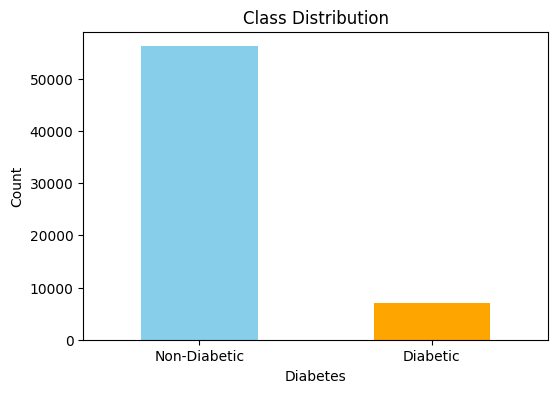

In [ ]:
import matplotlib.pyplot as plt

# Count plot to visualize class distribution
plt.figure(figsize=(6, 4))
plt.title('Class Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
df['diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'], rotation='horizontal')
plt.show()


**Feature Range**

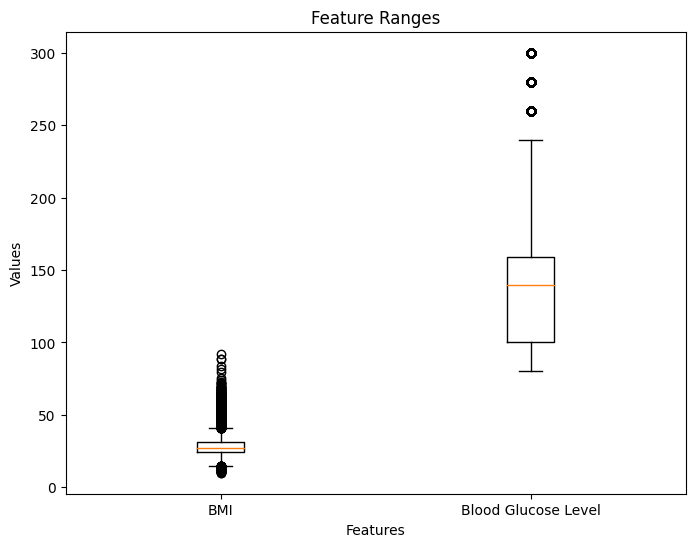

In [ ]:
# Box plot to visualize feature ranges
plt.figure(figsize=(8, 6))
plt.title('Feature Ranges')
plt.xlabel('Features')
plt.ylabel('Values')
plt.boxplot([df['bmi'], df['blood_glucose_level']], labels=['BMI', 'Blood Glucose Level'])
plt.show()


**Histograms**

**Histogram for age:** Helps us understand the age distribution of the sampled population, it shows that most of the people in our dataset are between the ages of 20-40.

**Histogram for BMI:**It provides insights into whether the population is predominantly within a certain BMI range or if it is spread out across a wider range. Here, it shows that majority of population's bmi is distributed between the values of 20-40.

**Histogram for HbA1c level:** It illustrates prevalence of different levels of glycated hemoglobin in the sampled population.

**Histogram for blood-glucose level:** It is crucial for understanding the distribution of blood glucose levels among the sampled individuals. Shows that most of the people have blood glucose level from approximately 50-170.

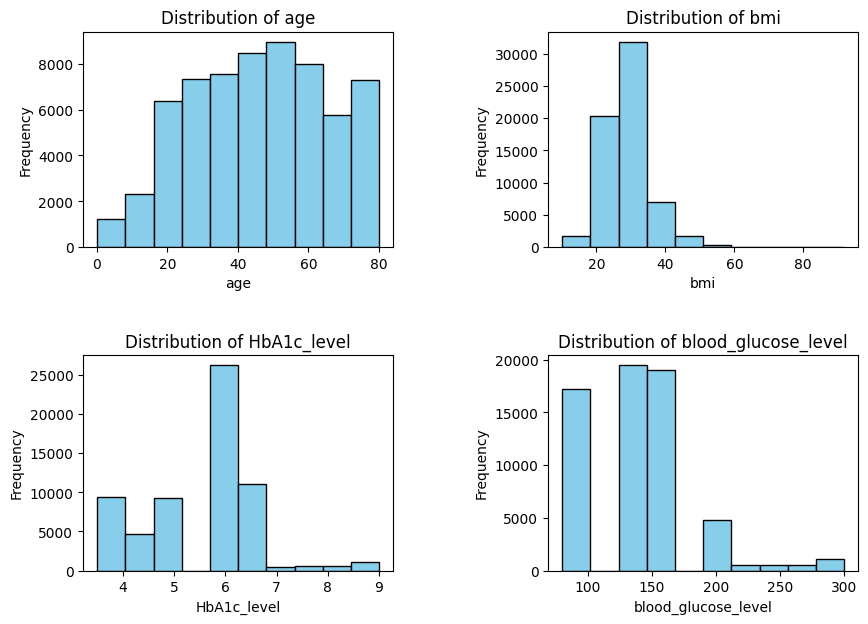

In [ ]:
import matplotlib.pyplot as plt

variables = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for i, var in enumerate(variables):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # histogram plot for the current variable
    ax.hist(df[var], bins=10, color='skyblue', edgecolor='black')

    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

**Piecharts**

Piecharts are plotted for the following features: Hyptertension, Heart Disease and Smoking History. These pie-charts visualize the percentage of positive cases vs the percentage of negative cases individually for all the features listed above. The results on pie-charts make it evident that on average around only 10% of sampled population have either of these underlying conditions that ultimately lead to diabetes, which explain the class imbalance.

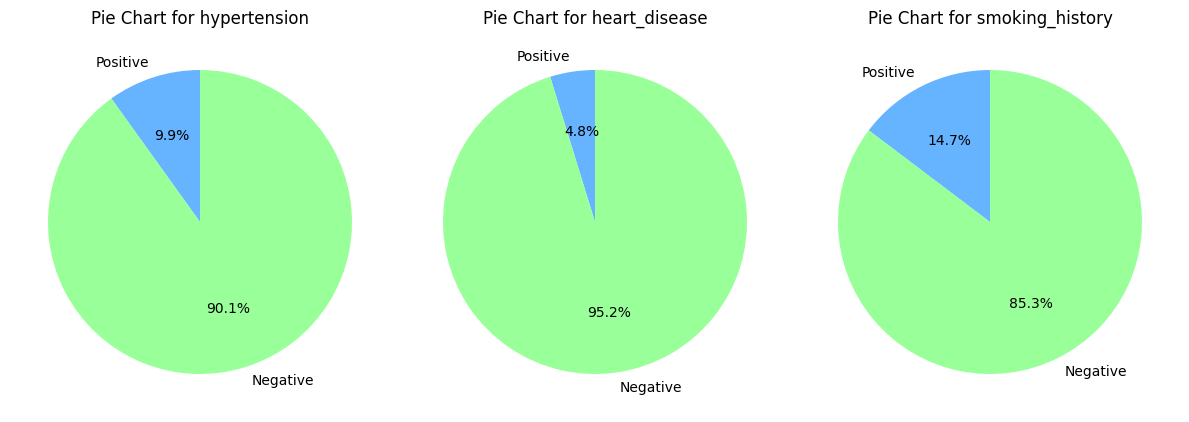

In [ ]:
import matplotlib.pyplot as plt

# Define the binary categorical variables
binary_variables = ['hypertension', 'heart_disease', 'smoking_history']

# counts for each category
counts = [df[var].value_counts()[1] for var in binary_variables]

# labels for the pie chart
labels = ['Positive', 'Negative']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Loop through the binary variables and create pie charts
for i, var in enumerate(binary_variables):
    ax = axes[i]
    ax.pie([counts[i], len(df) - counts[i]], labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
    ax.set_title(f'Pie Chart for {var}')

plt.tight_layout()
plt.show()

**Bar Plots**

Bar Plot for Gender indicates that majority of the population from the diabetes prediction dataset is female.

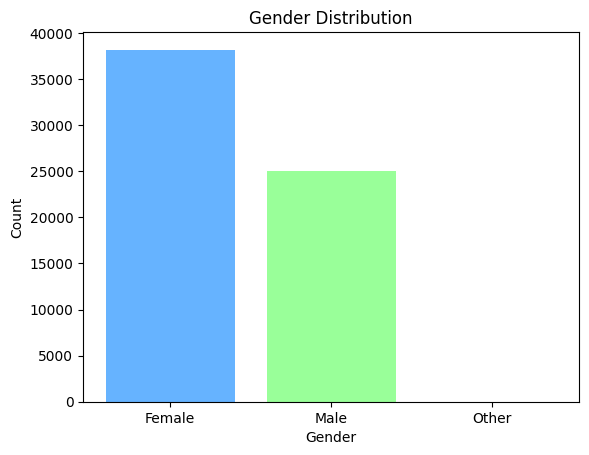

In [ ]:
# Bar Plot for Gender

import matplotlib.pyplot as plt

# Get the counts for each gender
gender_counts = df['gender'].value_counts()

# Define the labels and counts
labels = gender_counts.index
counts = gender_counts.values

plt.bar(labels, counts, color=['#66b3ff', '#99ff99'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

BMI Distribution plot illustrates that approximately 20000 people have their BMI in the range in the range of 25 to 30. Overall, the BMIs are between the range of 10-50.

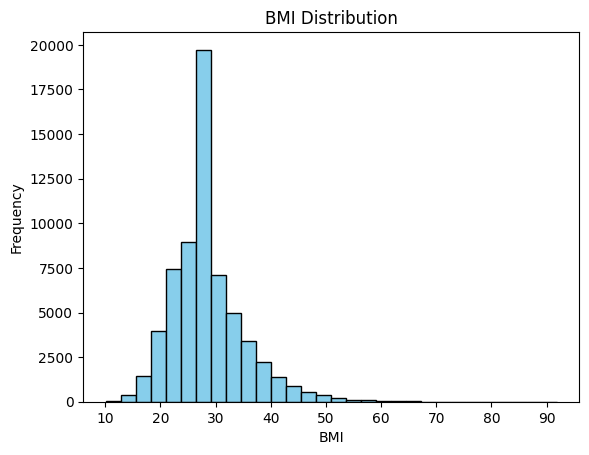

In [ ]:
# Distribution plot for bmi
import matplotlib.pyplot as plt

# Create a histogram for BMI
plt.hist(df['bmi'], bins=30, color='skyblue', edgecolor='black')

# title and labels
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()



**Bivariate Analysis (Gender vs Diabetes)**
This bar plot distinguishes the population on the basis of gender and further identifies the number of diabetic and non-diabetic people from both the genders. Sky-Blue portion of the bars indicate non-diabetic people and light-coral (top-portion) indicates diabetic patients.


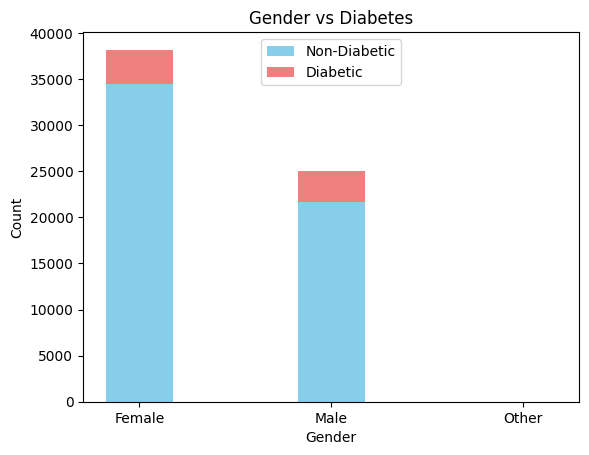

In [ ]:
# count plot for diabetes
import matplotlib.pyplot as plt

# Group the data by gender and diabetes, and get the counts
gender_diabetes_counts = df.groupby(['gender', 'diabetes']).size().unstack()

# Create a stacked bar plot
width = 0.35
x = range(len(gender_diabetes_counts.index))

fig, ax = plt.subplots()
ax.bar(x, gender_diabetes_counts[0], width, label='Non-Diabetic', color='skyblue')
ax.bar(x, gender_diabetes_counts[1], width, bottom=gender_diabetes_counts[0], label='Diabetic', color='lightcoral')

# Add title and labels
ax.set_title('Gender vs Diabetes')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(gender_diabetes_counts.index)
ax.legend()

plt.show()

**Multivariate Analysis**

**Observations:**

The plot reveals no evident linear correlation between age and BMI, regardless
of diabetes status.

Data points are uniformly distributed, demonstrating a broad range of BMI values at various ages and across both diabetic and non-diabetic groups.

Some data points deviate notably from the overall distribution, potentially signifying individuals with exceptional BMI values. These outliers are observed in both diabetic and non-diabetic groups.


**Interpretation:**

The scatter plot underscores that BMI is influenced by a multitude of factors beyond age, regardless of diabetes status. The color-coded points provide a visual distinction between diabetic and non-diabetic individuals within the plot.

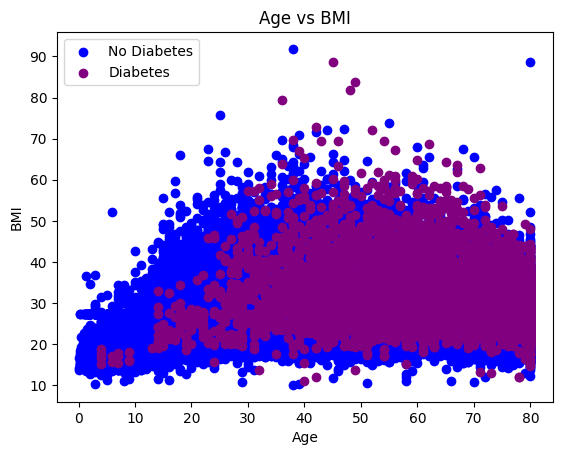

In [ ]:
import matplotlib.pyplot as plt

# Separating the data based on diabetes classification
diabetes_0 = df[df['diabetes'] == 0]
diabetes_1 = df[df['diabetes'] == 1]

# Plotting scatter plot
plt.scatter(diabetes_0['age'], diabetes_0['bmi'], c='blue', label='No Diabetes')
plt.scatter(diabetes_1['age'], diabetes_1['bmi'], c='purple', label='Diabetes')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')

plt.legend()
plt.show()

**Correlation**

A correlation matrix heatmap was constructed to visually represent the relationships between various features in the dataset; each cell in the heatmap is color-coded to indicate the strength and direction of the correlation.

**Positive Correlation:** When two variables have a positive correlation, an increase in one variable tends to be associated with an increase in the other variable. In the heatmap, positive correlations are represented by warmer colors (closer to red), indicating that as one feature increases, the other feature is also likely to increase.

**Negative Correlation:** Conversely, a negative correlation implies that an increase in one variable is associated with a decrease in the other variable. Negative correlations are depicted by cooler colors (closer to blue) in the heatmap.

**Insights:**

Diagonal Values: The diagonal of the correlation matrix contains ones (since a variable is perfectly correlated with itself), perfectly depicted by warm red color.

Symmetry: The matrix is symmetric, meaning the correlation between for instance, hypertension and blood_glucose_level is the same as the correlation between blood_glucose_level and hypertension.

Our correlation matrix shows cooler colors for all combinations of different features(except themselves), which indicates that increase in HbA1c_level (for instance) is associated with the decrease in heart_disease feature.

The horizontal bar chart shows the correlation between all the features and diabetes (target variable) individually. All the features have positive correlation with diabetes ofcourse, but likelihood of having diabetes is most positively impacted by HbA1c levels and Blood glucose levels.

<Figure size 1500x1000 with 0 Axes>

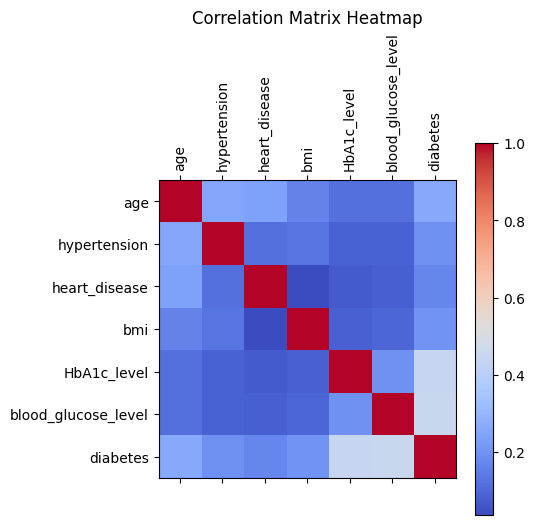

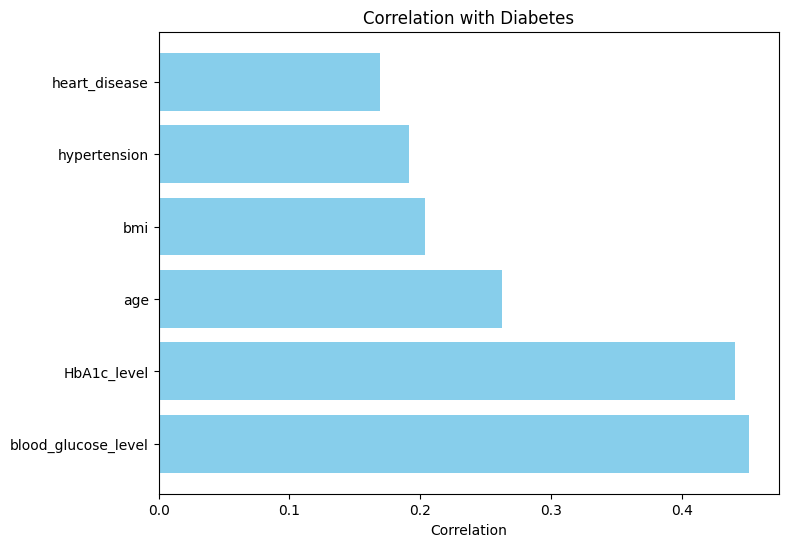

In [ ]:
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Graph I - Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Graph II - Correlation with Diabetes
# Create a heatmap of the correlations with the target column
target_corr = correlation_matrix['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(target_corr_sorted.index, target_corr_sorted.values, color='skyblue')
plt.xlabel('Correlation')
plt.title('Correlation with Diabetes')
plt.show()


**Outlier Detection through Boxplots**

To check whether we have any outliers in the data, we used box plots for all the numeric features e.g. Age, BMI, HbA1c_level, and blood_glucose_level. The red dots on the Box Plots represent the outliers.


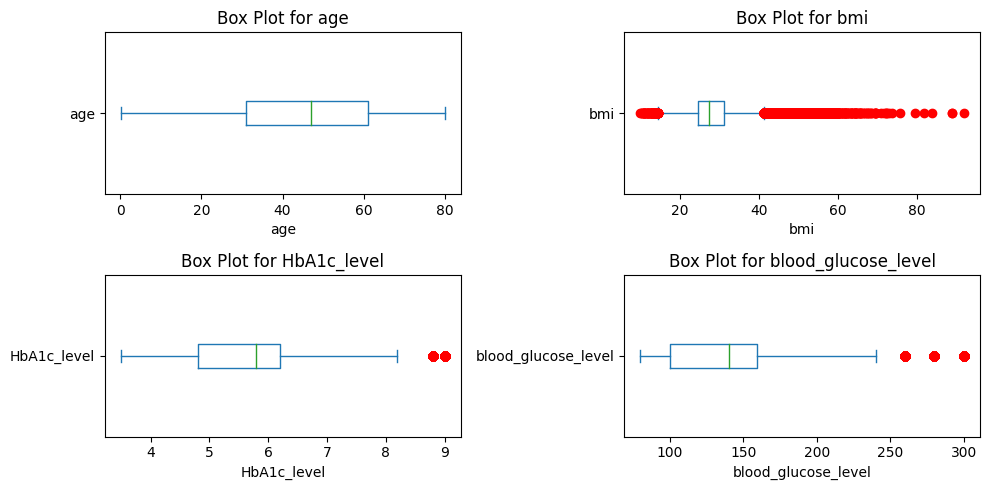

In [ ]:
# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Iterate through numeric columns and create box plots
for i, ax in enumerate(axes.flat):
    df[numeric_columns[i]].plot(kind='box', vert=False, ax=ax, sym='r')
    ax.set_title(f'Box Plot for {numeric_columns[i]}')
    ax.set_xlabel(numeric_columns[i])

plt.tight_layout()
plt.show()


# **Preparing the Dataframe**

**Encoding categorical variables appropriately**

Encoding categorical variables to numeric values before applying the linear classifier model and logistic regression classifier model on the dataset is necessary because linear classifier models can only work with numeric features.

Encoding categorical variables to numeric values helped us to:

Make the data more compatible with linear classifier and logistic regression models.
Improve the performance of linear classifier and logistic regression models.
Make the data easier to visualize and interpret.



In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'gender'
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['gender'] = label_encoder.fit_transform(df_encoded['gender'])

# Label Encoding for 'smoking_history'
smoking_history_mapping = {
    'never': 0,
    'former': 1,
    'current': 2,
    'not current': 3,
    'ever': 4
}

df_encoded['smoking_history'] = df_encoded['smoking_history'].map(smoking_history_mapping)
df_encoded

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,0,34.34,6.5,160,0
99993,0,40.0,0,0,0,40.69,3.5,155,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


# **Model Building**

## **Linear Classifier**

**Splitting the Data into Features and Labels:**

The first step is to split the data into features and labels. Features are the independent variables in the model, and labels are the dependent variables. In this case, the features are blood glucose level and HbA1c level, and the label is diabetes status.

**Standardizing the Features:**

Next, the features are standardized using a StandardScaler object. This means that the features are all scaled to have a mean of 0 and a standard deviation of 1. This is important for machine learning algorithms because it helps to ensure that all features are on the same scale and that no single feature dominates the model.

**Splitting the Standardized Features into Training and Testing Sets:**

The standardized features are then split into training and testing sets using train_test_split(). This is important to avoid overfitting, which occurs when a model learns the training data too well and is unable to generalize to new data.

**Training a Perceptron Classifier:**

A Perceptron classifier is created and trained on the standardized training data using the fit() method.

**Making Predictions on the Testing Data:**

The trained Perceptron classifier is used to make predictions on the standardized testing data using the predict() method.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and labels
features = df_encoded[['blood_glucose_level', 'HbA1c_level']]
labels = df_encoded['diabetes']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the standardized features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.25, random_state=42)

# Create a Perceptron classifier
clf = Perceptron()

# Train the classifier on the standardized training data
clf.fit(X_train, y_train)

# Make predictions on the standardized testing data
predictions = clf.predict(X_test)


**Performance Metrics**

In [ ]:
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate F1 score
f1 = f1_score(y_test, predictions)

print('Precision:', precision)
print('F1 Score:', f1)


Accuracy: 0.9226683528295921
Precision: 1.0
F1 Score: 0.4910528506034124


**Performance Evaluation:**

The accuracy of 92.27% indicates that the model is performing well in terms of overall prediction correctness.
The perfect precision score suggests that when the model predicts diabetes, it is highly reliable.

However, the low F1 score of 0.4911 indicates a trade-off between precision and recall. It suggests that the model might be missing a significant number of positive cases (diabetes) while having a high precision on the cases it predicts as positive.

**Visualization through Decision-Boundary**

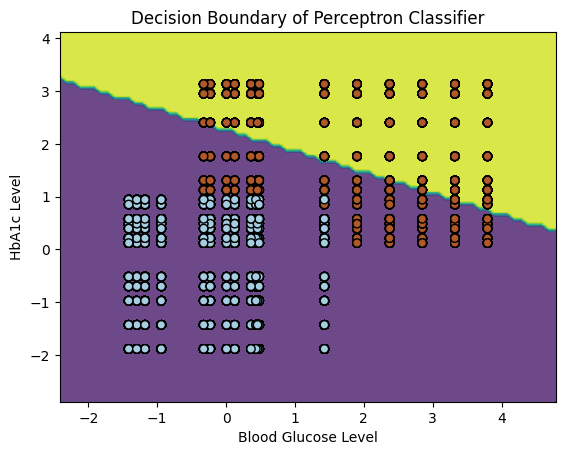

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your DataFrame containing the features
# Select the features you want to standardize
selected_features = ['blood_glucose_level', 'HbA1c_level']
features_to_standardize = features[selected_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
features_standardized = scaler.fit_transform(features_to_standardize)

# Set feature names for the DataFrame
features_standardized_df = pd.DataFrame(features_standardized, columns=['blood_glucose_level', 'HbA1c_level'])

# Generate a mesh grid of points for visualization
x_min, x_max = features_standardized_df['blood_glucose_level'].min() - 1, features_standardized_df['blood_glucose_level'].max() + 1
y_min, y_max = features_standardized_df['HbA1c_level'].min() - 1, features_standardized_df['HbA1c_level'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for the points in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(features_standardized_df['blood_glucose_level'], features_standardized_df['HbA1c_level'], c=labels, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.title('Decision Boundary of Perceptron Classifier')
plt.show()


## **Manual Linear Classifier**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score

# Extracting features and target variable
X = df[['HbA1c_level', 'blood_glucose_level']].values
y = df['diabetes'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the function to make predictions
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

# Initialize parameters (theta)
np.random.seed(0)  # For reproducibility
theta = np.random.randn(X_train.shape[1])

# Define the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 5000

# Train the model using gradient descent
for _ in range(num_iterations):
    predictions = predict(X_train, theta)
    error = y_train - predictions
    gradient = np.dot(X_train.T, error) / len(y_train)
    theta += learning_rate * gradient

# Make predictions on the test data
predictions = predict(X_test, theta)

# Convert probability predictions to binary values (0 or 1)
predicted_labels = np.round(predictions)


**Performance Metrics**

In [ ]:
# Calculate accuracy on test data
accuracy = np.mean(predicted_labels == y_test)

print(f"Accuracy: {accuracy}")

# Calculate the precision and F1 score
precision = precision_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the precision and F1 score
print(f"Precision: {precision:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.6304141637685742
Precision: 0.23
F1 score: 0.38


**Performance Evaluation:**

 While an accuracy of 63.04% might seem decent, it's important to consider the class distribution. If the dataset is imbalanced, accuracy might not be the most reliable metric.

A precision of 0.23 suggests that the model has a high rate of false positives. In a medical context like predicting diabetes, a low precision means that there are a substantial number of false alarms - people predicted to have diabetes who don't actually have it.

An F1 score of 0.38 indicates that there is room for improvement in the model's ability to balance between precision and recall. It suggests that the model is not performing well in both minimizing false positives and capturing all actual positives.

**Visualization of Results**

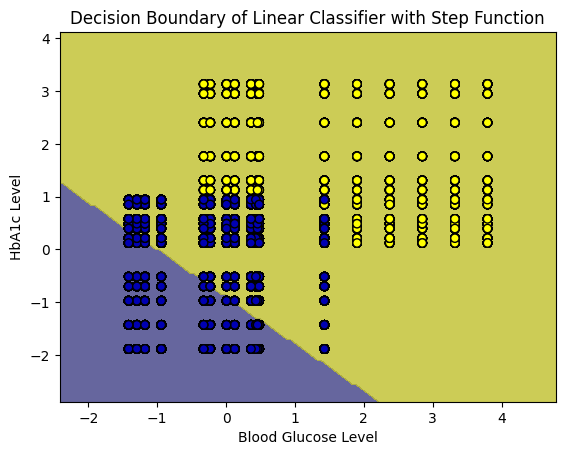

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Select the features you want to standardize
selected_features = ['blood_glucose_level', 'HbA1c_level']
features_to_standardize = features[selected_features]

# Standardize the features
features_standardized = scaler.fit_transform(features_to_standardize)

# Set feature names for the DataFrame
features_standardized_df = pd.DataFrame(features_standardized, columns=['blood_glucose_level', 'HbA1c_level'])

# Generate a high-resolution mesh grid of points for visualization
x_min, x_max = features_standardized_df['blood_glucose_level'].min() - 1, features_standardized_df['blood_glucose_level'].max() + 1
y_min, y_max = features_standardized_df['HbA1c_level'].min() - 1, features_standardized_df['HbA1c_level'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Create a matrix with shape (len(xx.ravel()), 2) by combining xx and yy
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Ensure theta is reshaped properly for dot product
theta_reshaped = theta.reshape(1, -1)

# Calculate the decision boundary using your linear classifier (theta)
Z = np.dot(mesh_points, theta_reshaped.T) + theta[0]

# Apply step function to classify points based on decision boundary
Z[Z >= 0] = 1
Z[Z < 0] = -1

# Reshape Z to match the shape of xx
Z = Z.reshape(xx.shape)

# Create a Jet colormap
jet = LinearSegmentedColormap.from_list('jet', [[0, 0, 0.7], [1, 1, 0]])

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], alpha=0.8, cmap=jet)
plt.scatter(features_standardized_df['blood_glucose_level'], features_standardized_df['HbA1c_level'], c=labels, edgecolors='k', marker='o', cmap=jet)
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.title('Decision Boundary of Linear Classifier with Step Function')
plt.show()




## **Logistic Regression**

**1. Data Preparation:**
Feature Selection: The model uses 'HbA1c_level' and 'blood_glucose_level' as the input features.
Label Definition: 'diabetes' column is used as the target variable (label).

**2. Data Splitting:**
The dataset is split into training and testing sets using the train_test_split function. 75% of the data is used for training (X_train, y_train), and 25% is used for testing (X_test, y_test).

**3. Data Standardization:**
StandardScaler is applied to scale the features. Standardization ensures that the features have a mean of 0 and a standard deviation of 1, making them comparable and improving the model's convergence during training.

**4. Logistic Regression Model Initialization and Training:**
A Logistic Regression model is initialized with max_iter=1000. The max_iter parameter specifies the maximum number of iterations taken for the solver to converge.

**5. Model Training:**
The logistic regression model is trained using the scaled training data (X_train_scaled, y_train).

**6. Prediction:**
The model is used to make predictions on the scaled testing data (X_test_scaled), and the predictions are stored in the predictions variable.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set a fixed random seed for reproducibility
np.random.seed(42)

# Assuming your encoded data is stored in a DataFrame called df_encoded

# Split the data into features and labels
features = df_encoded[['HbA1c_level', 'blood_glucose_level']]  # Select only 'HbA1c_level' and 'blood_glucose_level' columns
labels = df_encoded['diabetes']  # Target variable is 'diabetes'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier with increased max_iter
clf = LogisticRegression(max_iter=1000)

# Train the classifier on the scaled training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
predictions = clf.predict(X_test_scaled)


**Performance Metrics**

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate and print the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate F1 score
f1 = f1_score(y_test, predictions)

print('Precision:', precision)
print('F1 Score:', f1)


Accuracy: 0.9361998103066709
Precision: 0.8401015228426396
F1 Score: 0.6631051752921536


**Performance Evaluation:**

These metrics suggest that the model performs well in terms of accuracy, precision, and F1 score. An accuracy of 93.62% is quite good, indicating that the model is making accurate predictions on the test data. The precision of 84.01% suggests that the model is good at minimizing false positives, and the F1 score of 66.31% indicates a balanced performance between precision and recall. Overall, it seems like the logistic regression model is doing a good job in predicting diabetes based on the given features.

**Visualization of Output of Logistic Regression**

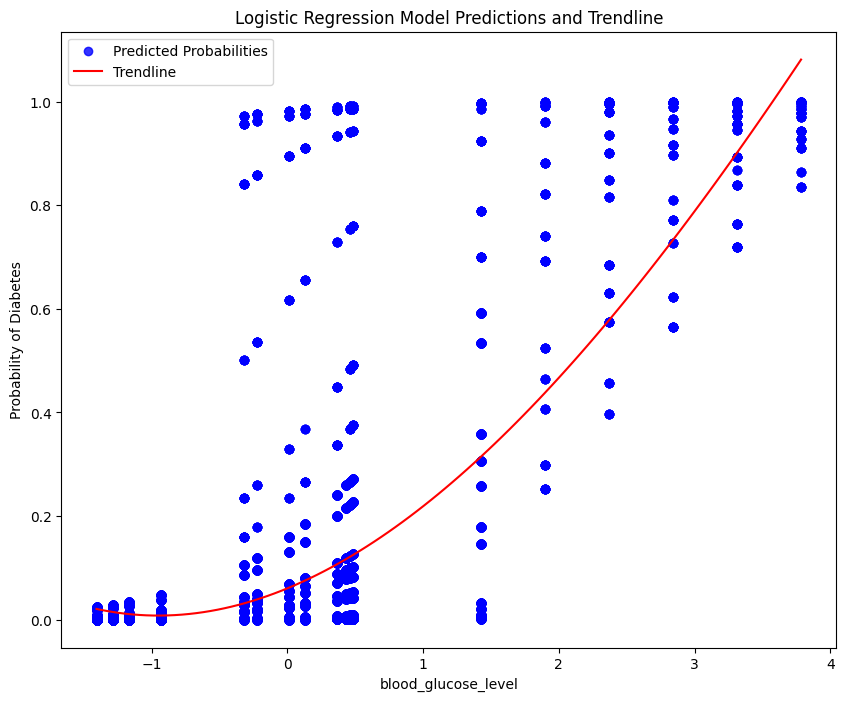

In [ ]:
# Get the predicted probabilities from the logistic regression model
y_pred = clf.predict_proba(X_test_scaled)[:, 1]

# Sort the data by predicted values
x_sorted, y_sorted = zip(*sorted(zip(X_test_scaled[:, 1], y_pred)))

# Fit a polynomial trendline
poly = np.polyfit(x_sorted, y_sorted, 3)

# Generate the trendline
x_trend = np.linspace(x_sorted[0], x_sorted[-1], 100)
y_trend = np.polyval(poly, x_trend)

# Plot the trendline and predicted probabilities
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[:, 1], y_pred, c='blue', alpha=0.8, label='Predicted Probabilities')
plt.plot(x_trend, y_trend, c='red', label='Trendline')
plt.xlabel('blood_glucose_level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.title('Logistic Regression Model Predictions and Trendline')
plt.show()


## **Manual Implementation of Logistic Regression**

**1. Data Preparation and Standardization:**
The model uses 'HbA1c_level' and 'blood_glucose_level' as input features.
The data is split into training and testing sets using train_test_split. The standard practice is to use 75% for training and 25% for testing.
Standardization of features is performed using the StandardScaler, making the features comparable and improving model convergence.

**2. Sigmoid Function:**
The sigmoid (logistic) function is defined, which transforms the linear combination of features and weights into a probability between 0 and 1.

**3. Model Initialization:**
Model weights (theta) and bias are initialized. Here, weights include the bias term.

**4. Hyperparameters and Training:**
Hyperparameters include the learning rate and the number of iterations.
A loop runs for the specified number of iterations, updating the model's weights based on the gradient descent algorithm.
Predictions are made at each iteration using the sigmoid function.
The cost (log-likelihood) and gradients are computed based on the predictions and the training labels.
Weights are updated in the direction that minimizes the cost.

**5. Prediction and Evaluation:**
The model is tested on the test set, and test predictions are obtained by applying the sigmoid function to the linear combination of features and the learned weights. Predicted probabilities are converted to binary predictions (0 or 1) using a threshold (0.5 by rounding). Accuracy is calculated using accuracy_score to measure how well the model predicts the test data.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X contains your features and y contains your target variable (diabetes)
X = df_encoded[['HbA1c_level', 'blood_glucose_level']].values
y = df_encoded['diabetes'].values

# Add a bias term to X
X_with_bias = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.25, random_state=42)

# Standardize features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sigmoid (logistic) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
theta = np.zeros(X_train_scaled.shape[1])

# Learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent for Logistic Regression
for i in range(num_iterations):
    # Linear combination of features and weights + bias
    z = np.dot(X_train_scaled, theta)

    # Predictions using sigmoid function
    predictions = sigmoid(z)

    # Compute cost (log-likelihood) and gradients
    cost = -np.mean(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))
    gradient = np.dot(X_train_scaled.T, (predictions - y_train)) / len(y_train)

    # Update weights using gradient descent
    theta -= learning_rate * gradient

# Make predictions on the test set
test_predictions = sigmoid(np.dot(X_test_scaled, theta))

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = np.round(test_predictions)


**Performance Metrics**

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, binary_predictions)

# Calculate F1 score
f1 = f1_score(y_test, binary_predictions)

print('Precision:', precision)
print('F1 Score:', f1)


Accuracy: 0.6368637369585837
Precision: 0.2370182012847966
F1 Score: 0.3814754981152397


**Performance Evaluation:**

While the model shows some promise with a reasonable accuracy rate, addressing the issues related to precision, recall, and exploring additional features or algorithms are essential steps to enhance its performance, especially in critical applications such as medical diagnoses. Regular evaluation and iterative refinement of the model based on feedback and new data are also crucial to ensure its reliability and effectiveness.

**Visualization of Output (Manual Logistic Regression)**

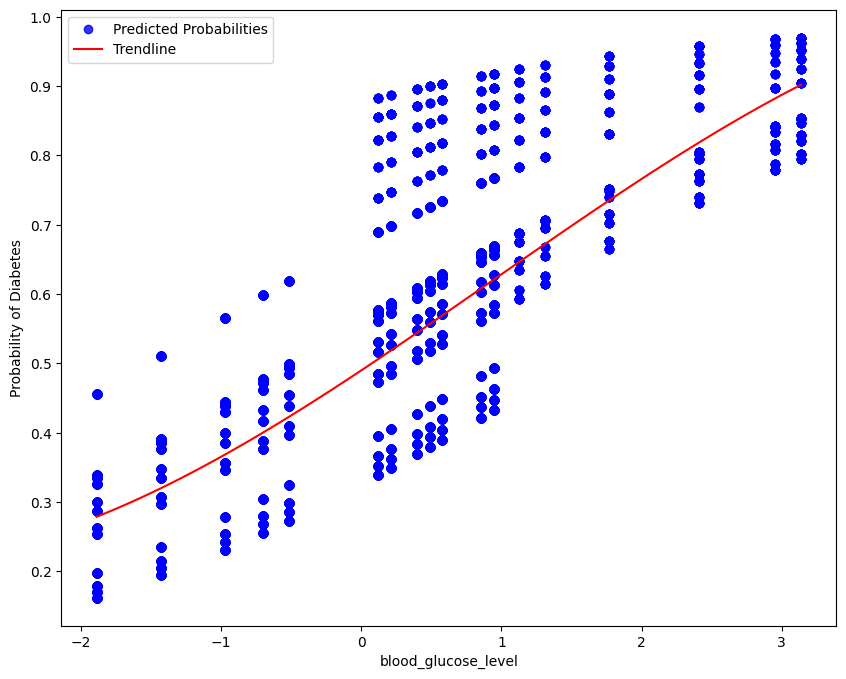

In [ ]:
# Get the predicted probabilities from the logistic regression model
y_pred = test_predictions

# Sort the data by predicted values
x_sorted, y_sorted = zip(*sorted(zip(X_test_scaled[:, 1], y_pred)))

# Fit a polynomial trendline
poly = np.polyfit(x_sorted, y_sorted, 3)

# Generate the trendline
x_trend = np.linspace(x_sorted[0], x_sorted[-1], 100)
y_trend = np.polyval(poly, x_trend)

# Plot the trendline and predicted values
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[:, 1], y_pred, c='blue', alpha=0.8, label='Predicted Probabilities')
plt.plot(x_trend, y_trend, c='red', label='Trendline')
plt.xlabel('blood_glucose_level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.show()


The trend of the above graph highlights the relationship between blood glucose level and diabetes. The graph almost shows a linear relationship between the two features. We can conclude that as the Blood Glucose level rises so does the probability of Diabetes.

# **Conclusion and Recommendations**

## **Impact of Class Imbalance on Model Performance:**

The prevalent class imbalance, with a substantial majority of non-diabetic cases compared to diabetic cases (as already discussed in EDA above), played a pivotal role in shaping our models' outcomes.

### **Accuracy:**

The models, particularly the automated ones, demonstrated relatively high accuracy. However, this metric can be misleading in imbalanced datasets. The high accuracy might be attributed to the models favoring the majority class, thus not accurately reflecting their ability to identify diabetic individuals.

### **Precision:**
Precision, which gauges the accuracy of positive predictions, was notably affected. In the presence of class imbalance, models tended to predict the majority class more frequently, diminishing their precision in identifying diabetic patients. The lower precision indicates a higher rate of false positives, where non-diabetic individuals were wrongly classified as diabetic.

### **F1 Score:**
The F1 score, considering both precision and recall, provided a balanced assessment. Yet, even this metric was impacted due to the abundance of false positives caused by the class imbalance. While the F1 score offers a fairer evaluation, the challenges posed by class imbalance persisted.

## **Recommendations for Addressing Class Imbalance:**

Addressing the class imbalance is imperative for enhancing model accuracy and precision in identifying diabetes cases. Techniques such as oversampling, undersampling, or synthetic data generation should be employed. By equalizing the representation of diabetic and non-diabetic cases, the models can be trained on a more balanced dataset, reducing the impact of class imbalance on their performance.

In essence, acknowledging and rectifying the class imbalance is pivotal. It not only ensures a more accurate evaluation of the models but also serves as the key to their enhanced performance in real-world scenarios such as diabetes prediction, making our predictions more reliable and applicable.